In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier





In [49]:
tb = pd.read_csv('data/Traffic_Crashes_-_Crashes.csv.gz')
tb_1 = pd.read_csv('data/Traffic_Crashes_-_People.csv.gz') 
tb_2 = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv.gz')

/tmp/ipykernel_5724/1645537503.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  tb_1 = pd.read_csv('data/Traffic_Crashes_-_People.csv.gz')
/tmp/ipykernel_5724/1645537503.py:3: DtypeWarning: Columns (20,39,40,41,47,48,49,57,58,60) have mixed types. Specify dtype option on import or set low_memory=False.
  tb_2 = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv.gz')


In [50]:
print(tb.shape)
print(tb_1.shape)
print(tb_2.shape)

(54959, 48)
(120061, 29)
(111727, 71)


In [51]:
tb.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,d4532856f89a7311fb6182ffef7cd3c27fdba4dba40671...,NaN,12/30/2025 11:50:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,0.0,1.0,1.0,0.0,23,3,12,41.743702,-87.624186,POINT (-87.624185929083 41.743702317364)
1,b938fbfa86d8b2d58d26656bf3266bc5452af63bd100ad...,NaN,12/30/2025 11:21:00 PM,30,UNKNOWN,UNKNOWN,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,0.0,1.0,0.0,23,3,12,41.853734,-87.653792,POINT (-87.653792075361 41.85373399224)
2,bb8c152ed4e0d29961e051b7d381508f1f9ea5aa051dbe...,NaN,12/30/2025 10:55:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,3,12,41.906573,-87.687268,POINT (-87.687268089375 41.906573215648)
3,40064b1f9d498293c9392d4c89bb60128409738a3c44d1...,NaN,12/30/2025 10:51:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,0.0,1.0,3.0,0.0,22,3,12,41.807373,-87.622931,POINT (-87.622930554709 41.807373001937)
4,efce3ab254c9daaacb6ce6a60e10e8cb8ca50ab3f7ea5b...,NaN,12/30/2025 10:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,22,3,12,41.928409,-87.702567,POINT (-87.702567230162 41.928408615992)


In [52]:
tb_1.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O2218091,DRIVER,d4532856f89a7311fb6182ffef7cd3c27fdba4dba40671...,2114560.0,12/30/2025 11:50:00 PM,NaN,CHICAGO,IL,60617,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O2218092,DRIVER,d4532856f89a7311fb6182ffef7cd3c27fdba4dba40671...,2114556.0,12/30/2025 11:50:00 PM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O2218087,DRIVER,b938fbfa86d8b2d58d26656bf3266bc5452af63bd100ad...,2114554.0,12/30/2025 11:21:00 PM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O2218080,DRIVER,bb8c152ed4e0d29961e051b7d381508f1f9ea5aa051dbe...,2114549.0,12/30/2025 10:55:00 PM,NaN,CHICAGO,IL,60660,M,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O2218081,DRIVER,bb8c152ed4e0d29961e051b7d381508f1f9ea5aa051dbe...,2114552.0,12/30/2025 10:55:00 PM,NaN,CHICAGO,IL,60618,M,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [53]:
tb_2.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,2218091,d4532856f89a7311fb6182ffef7cd3c27fdba4dba40671...,12/30/2025 11:50:00 PM,2,DRIVER,NaN,2114560.0,NaN,HYUNDAI,ELANTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2218092,d4532856f89a7311fb6182ffef7cd3c27fdba4dba40671...,12/30/2025 11:50:00 PM,1,DRIVER,NaN,2114556.0,NaN,UNKNOWN,OTHER (EXPLAIN IN NARRATIVE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2218087,b938fbfa86d8b2d58d26656bf3266bc5452af63bd100ad...,12/30/2025 11:21:00 PM,1,DRIVER,NaN,2114554.0,NaN,GENERAL MOTORS CORPORATION (GMC),OTHER (EXPLAIN IN NARRATIVE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2218080,bb8c152ed4e0d29961e051b7d381508f1f9ea5aa051dbe...,12/30/2025 10:55:00 PM,1,DRIVER,NaN,2114549.0,NaN,LEXUS,RX400H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2218081,bb8c152ed4e0d29961e051b7d381508f1f9ea5aa051dbe...,12/30/2025 10:55:00 PM,2,DRIVER,NaN,2114552.0,NaN,CHEVROLET,MALIBU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
tb.shape
tb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54959 entries, 0 to 54958
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                54959 non-null  object 
 1   CRASH_DATE_EST_I               3503 non-null   object 
 2   CRASH_DATE                     54959 non-null  object 
 3   POSTED_SPEED_LIMIT             54959 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         54959 non-null  object 
 5   DEVICE_CONDITION               54959 non-null  object 
 6   WEATHER_CONDITION              54959 non-null  object 
 7   LIGHTING_CONDITION             54959 non-null  object 
 8   FIRST_CRASH_TYPE               54959 non-null  object 
 9   TRAFFICWAY_TYPE                54959 non-null  object 
 10  LANE_CNT                       6 non-null      float64
 11  ALIGNMENT                      54959 non-null  object 
 12  ROADWAY_SURFACE_COND           54959 non-null 

In [55]:
tb.isnull().sum()

CRASH_RECORD_ID                      0
CRASH_DATE_EST_I                 51456
CRASH_DATE                           0
POSTED_SPEED_LIMIT                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
LANE_CNT                         54953
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                       2505
CRASH_TYPE                           0
INTERSECTION_RELATED_I           42355
NOT_RIGHT_OF_WAY_I               52823
HIT_AND_RUN_I                    37623
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION                     0
STREET_NAME              

In [56]:
tb = tb.dropna(subset=['MOST_SEVERE_INJURY'])
print(tb.shape)

(54854, 48)


In [57]:
dropped_columns = ['CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I', 
                'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I',
                'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 
                'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']

tb = tb.drop(columns=dropped_columns)
print(tb.shape)

(54854, 37)


In [58]:
tb = tb.dropna(subset=['LATITUDE', 'LONGITUDE'])
print(tb.shape)

(54296, 37)


In [59]:
tb['REPORT_TYPE']= tb['REPORT_TYPE'].fillna('Unknown')
print( tb.isnull().sum().sum())

0


In [60]:

tb['MOST_SEVERE_INJURY'].value_counts()

MOST_SEVERE_INJURY
NO INDICATION OF INJURY     45021
NONINCAPACITATING INJURY     4948
REPORTED, NOT EVIDENT        3480
INCAPACITATING INJURY         801
FATAL                          46
Name: count, dtype: int64

In [61]:

tb['INJURY_BINARY'] = tb['MOST_SEVERE_INJURY'].apply(
    lambda x: 'INJURY' if x != 'NO INDICATION OF INJURY' else 'NO_INJURY'
)

tb['INJURY_BINARY'].value_counts()

INJURY_BINARY
NO_INJURY    45021
INJURY        9275
Name: count, dtype: int64

In [62]:

tb['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10)

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                       22466
FAILING TO YIELD RIGHT-OF-WAY              6466
FOLLOWING TOO CLOSELY                      4955
IMPROPER OVERTAKING/PASSING                2983
NOT APPLICABLE                             2409
FAILING TO REDUCE SPEED TO AVOID CRASH     2252
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE        2147
IMPROPER TURNING/NO SIGNAL                 1871
IMPROPER LANE USAGE                        1795
IMPROPER BACKING                           1672
Name: count, dtype: int64

In [63]:

print(tb['WEATHER_CONDITION'].value_counts())

WEATHER_CONDITION
CLEAR                       43554
UNKNOWN                      4501
RAIN                         2785
SNOW                         1727
CLOUDY/OVERCAST              1357
OTHER                         194
FREEZING RAIN/DRIZZLE          73
BLOWING SNOW                   40
SLEET/HAIL                     39
FOG/SMOKE/HAZE                 22
SEVERE CROSS WIND GATE          3
BLOWING SAND, SOIL, DIRT        1
Name: count, dtype: int64


In [64]:

print(tb['LIGHTING_CONDITION'].value_counts())

LIGHTING_CONDITION
DAYLIGHT                  34211
DARKNESS, LIGHTED ROAD    11682
UNKNOWN                    3596
DARKNESS                   2434
DUSK                       1465
DAWN                        908
Name: count, dtype: int64


In [65]:

print(tb['FIRST_CRASH_TYPE'].value_counts())

FIRST_CRASH_TYPE
PARKED MOTOR VEHICLE            12070
REAR END                        10678
SIDESWIPE SAME DIRECTION         9315
TURNING                          7920
ANGLE                            5701
FIXED OBJECT                     2131
PEDALCYCLIST                     1532
PEDESTRIAN                       1472
REAR TO FRONT                     906
SIDESWIPE OPPOSITE DIRECTION      688
OTHER OBJECT                      583
REAR TO SIDE                      513
HEAD ON                           428
REAR TO REAR                      184
OTHER NONCOLLISION                 92
ANIMAL                             53
OVERTURNED                         25
TRAIN                               5
Name: count, dtype: int64


In [66]:

tb['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR                       43554
UNKNOWN                      4501
RAIN                         2785
SNOW                         1727
CLOUDY/OVERCAST              1357
OTHER                         194
FREEZING RAIN/DRIZZLE          73
BLOWING SNOW                   40
SLEET/HAIL                     39
FOG/SMOKE/HAZE                 22
SEVERE CROSS WIND GATE          3
BLOWING SAND, SOIL, DIRT        1
Name: count, dtype: int64

In [67]:

tb['LIGHTING_CONDITION'].value_counts()

LIGHTING_CONDITION
DAYLIGHT                  34211
DARKNESS, LIGHTED ROAD    11682
UNKNOWN                    3596
DARKNESS                   2434
DUSK                       1465
DAWN                        908
Name: count, dtype: int64

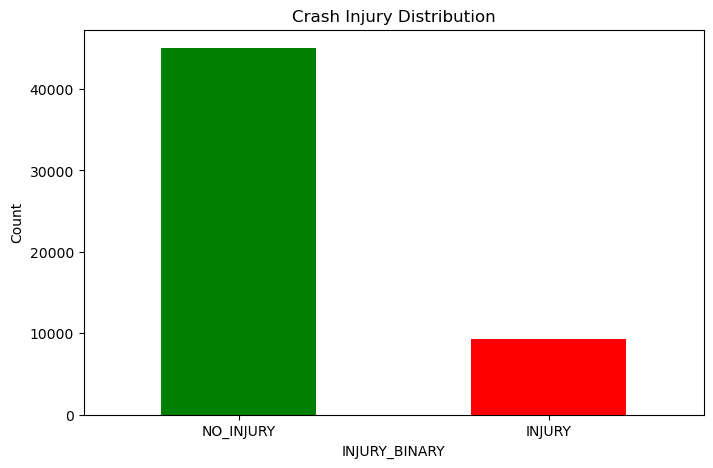

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Target distribution
plt.figure(figsize=(8, 5))
tb['INJURY_BINARY'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Crash Injury Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

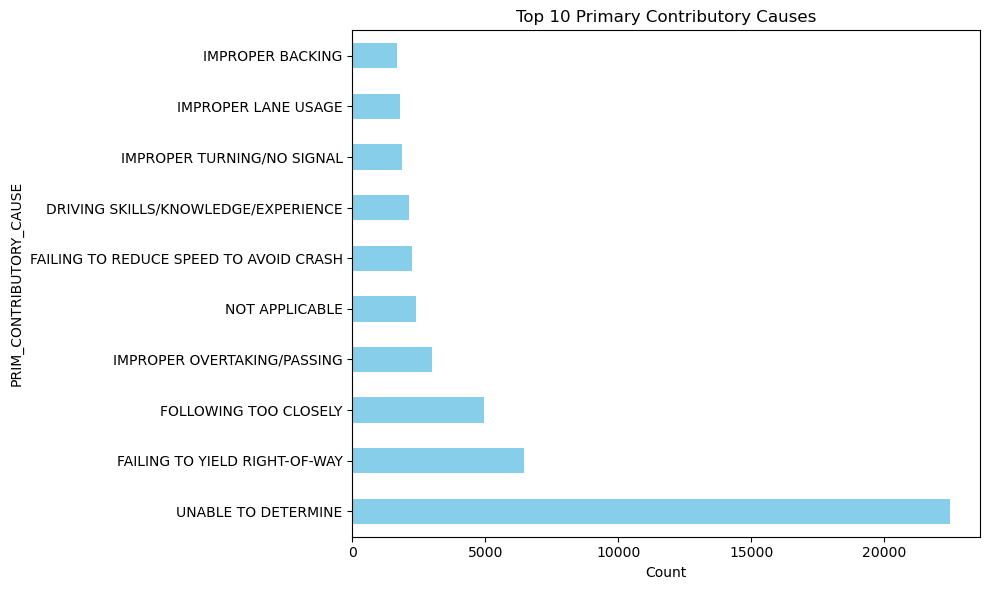

In [69]:
  
plt.figure(figsize=(10, 6))
tb['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Primary Contributory Causes')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

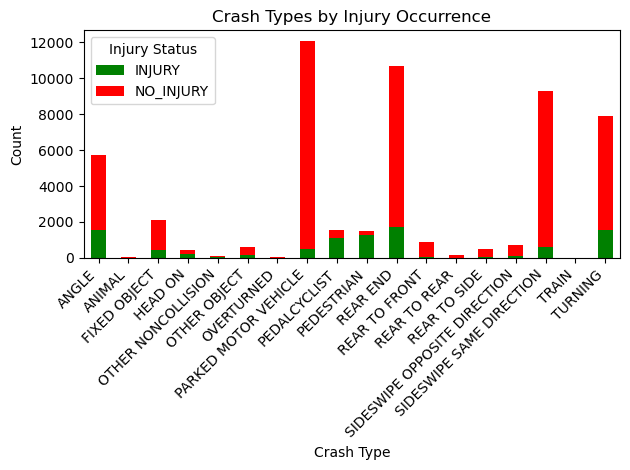

In [70]:

plt.figure(figsize=(12, 6))
crash_injury = pd.crosstab(tb['FIRST_CRASH_TYPE'], tb['INJURY_BINARY'])
crash_injury.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Crash Types by Injury Occurrence')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Status')
plt.tight_layout()
plt.show()

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [72]:

tb['combined_text'] = (
    tb['PRIM_CONTRIBUTORY_CAUSE'] + ' ' + 
    tb['WEATHER_CONDITION'] + ' ' + 
    tb['LIGHTING_CONDITION'] + ' ' + 
    tb['FIRST_CRASH_TYPE']
)


print(tb['combined_text'].head())

0    DISREGARDING TRAFFIC SIGNALS SNOW DARKNESS, LI...
1    UNABLE TO DETERMINE SNOW DARKNESS, LIGHTED ROA...
2    UNABLE TO DETERMINE UNKNOWN UNKNOWN SIDESWIPE ...
3    DISREGARDING STOP SIGN SNOW DARKNESS, LIGHTED ...
4    UNABLE TO DETERMINE SNOW DARKNESS, LIGHTED ROA...
Name: combined_text, dtype: object


In [73]:
from sklearn.model_selection import train_test_split


X = tb['combined_text']
y = tb['INJURY_BINARY']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print( X_train.shape)
print( X_test.shape)

print(y_train.value_counts())

(43436,)
(10860,)
INJURY_BINARY
NO_INJURY    36016
INJURY        7420
Name: count, dtype: int64


In [74]:

tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print( X_train_tfidf.shape)

(43436, 134)


In [75]:

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)


print(y_train.value_counts())

print(pd.Series(y_train_balanced).value_counts())

INJURY_BINARY
NO_INJURY    36016
INJURY        7420
Name: count, dtype: int64
INJURY_BINARY
NO_INJURY    36016
INJURY       36016
Name: count, dtype: int64


In [76]:

dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train_balanced, y_train_balanced)


dt_pred = dt_model.predict(X_test_tfidf)


print("Accuracy:", accuracy_score(y_test, dt_pred))

print(classification_report(y_test, dt_pred))

Accuracy: 0.7049723756906078
              precision    recall  f1-score   support

      INJURY       0.32      0.67      0.44      1855
   NO_INJURY       0.91      0.71      0.80      9005

    accuracy                           0.70     10860
   macro avg       0.62      0.69      0.62     10860
weighted avg       0.81      0.70      0.74     10860



In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_balanced, y_train_balanced)


rf_pred = rf_model.predict(X_test_tfidf)



print("Accuracy:", accuracy_score(y_test, rf_pred))

print(classification_report(y_test, rf_pred))

In [41]:
import pandas as pd


results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [0.7049, 0.6925],
    'Precision (Injury)': [0.32, 0.32],
    'Recall (Injury)': [0.67, 0.72]
})

print(results)

           Model  Accuracy  Precision (Injury)  Recall (Injury)
0  Decision Tree    0.7049                0.32             0.67
1  Random Forest    0.6925                0.32             0.72


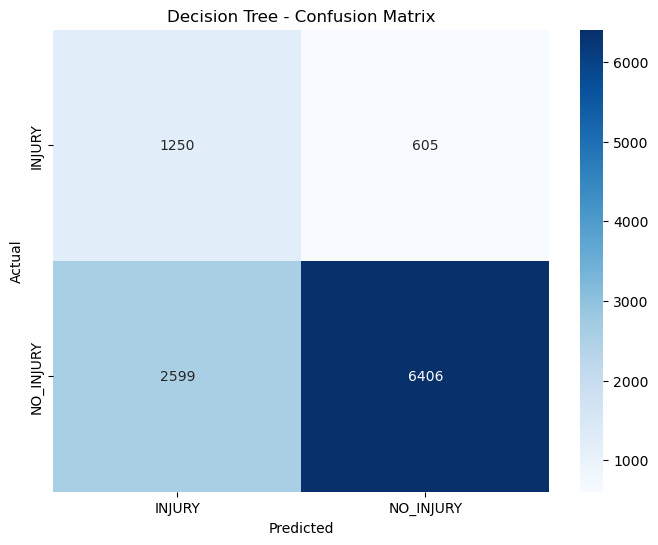

In [42]:


cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['INJURY', 'NO_INJURY'],
            yticklabels=['INJURY', 'NO_INJURY'])
plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

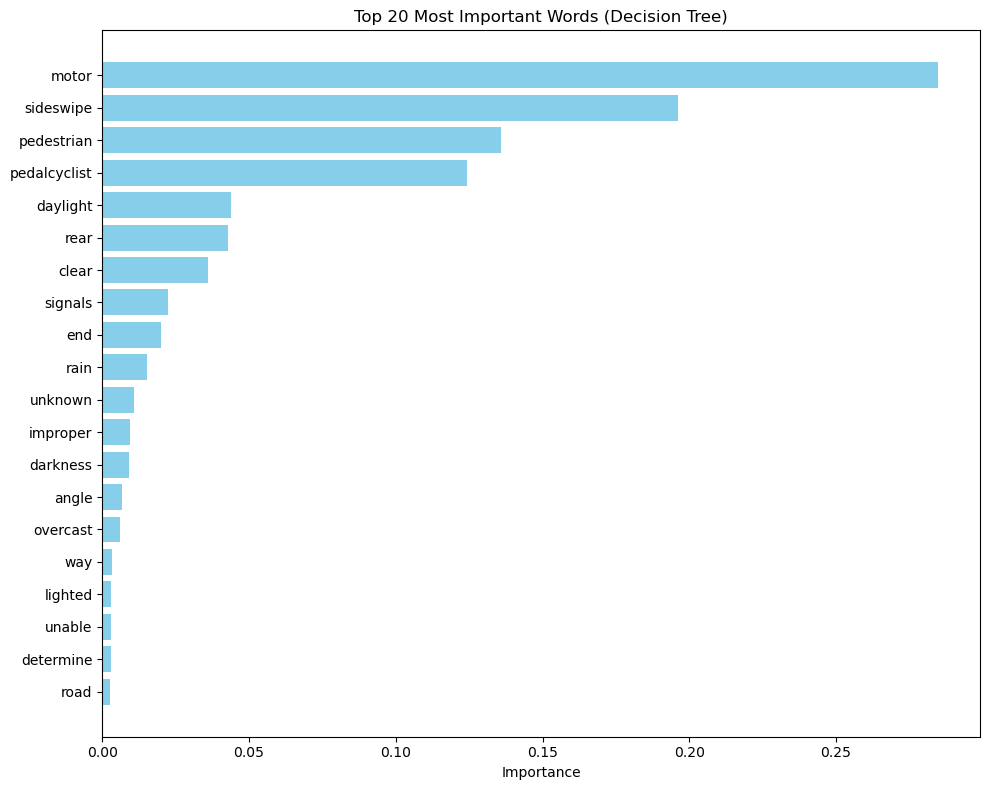

Top 10 Most Important Features:
          feature  importance
71          motor    0.284814
104     sideswipe    0.196065
89     pedestrian    0.135804
88   pedalcyclist    0.124355
26       daylight    0.043850
94           rear    0.042740
16          clear    0.035870
107       signals    0.022210
43            end    0.020053
93           rain    0.015158


In [43]:
#  feature importance
feature_names = tfidf.get_feature_names_out()
importances = dt_model.feature_importances_


feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)


top_features = feature_importance_df.head(20)


plt.figure(figsize=(10, 8))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Most Important Words (Decision Tree)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(top_features.head(10))